<a href="https://colab.research.google.com/github/shijisimon/EDA/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/secondary_data.csv',delimiter=';')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [5]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


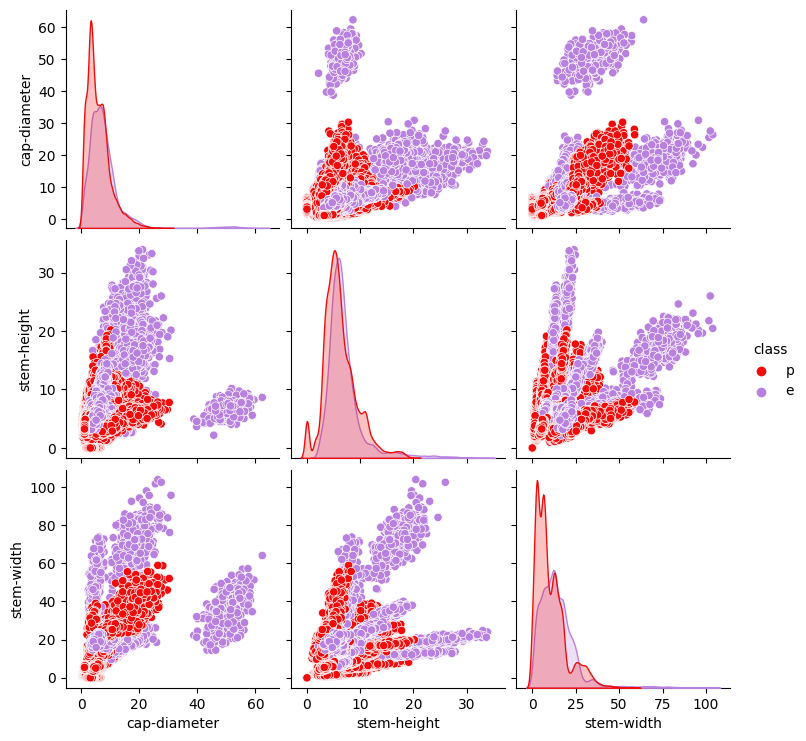

In [6]:
sns.set_palette(sns.color_palette(["#F10C0C", "#B880DF"]))
sns.pairplot(df, hue='class')

Based on these plots, it looks like a large cap-diameter coupled with a large stem-height and/or stem-width is a good indication that a mushroom is poisonous. So here it seems that unusually large mushrooms are very likely to be poisonous. Stem-height and stem-width seem to be better predictors than cap-diameter alone for determining toxicity.

There is good separation of the data for mushrooms with exceptionally large size, but in the mid-range, both edible and poisonous mushrooms are found. Let's get a better sense of the size distribution of mushrooms by examining a bivariate kde plot of stem-height vs. cap-diameter. A kde plot shows the probability distribution of a continuous variable. A bivariate kde plot shows the joint probability distribution of two continuous variables.

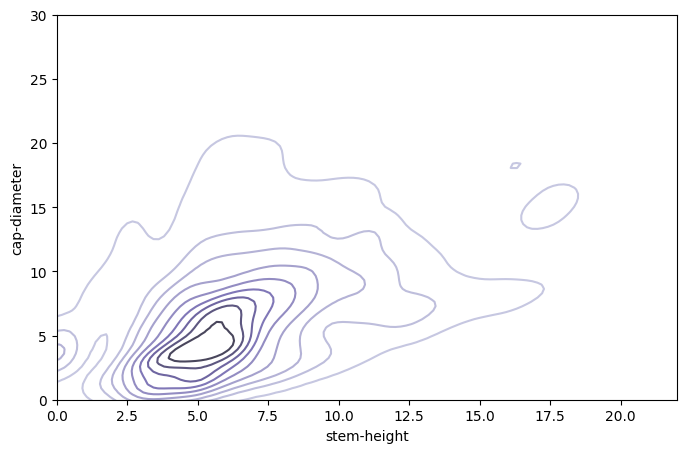

In [11]:
f, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim([0,22])
ax.set_ylim([0,30])
ax = sns.kdeplot(x=df['stem-height'], y=df['cap-diameter'],
                 cmap="Purples_d")

Here we see that mid-size mushrooms with a stem-height around 5, and a cap-diameter around 5 are the most commonly occurring mushrooms, though there is quite a lot of variance. Let's explore how much variance there is in each of these features by creating a boxplot.

<Axes: >

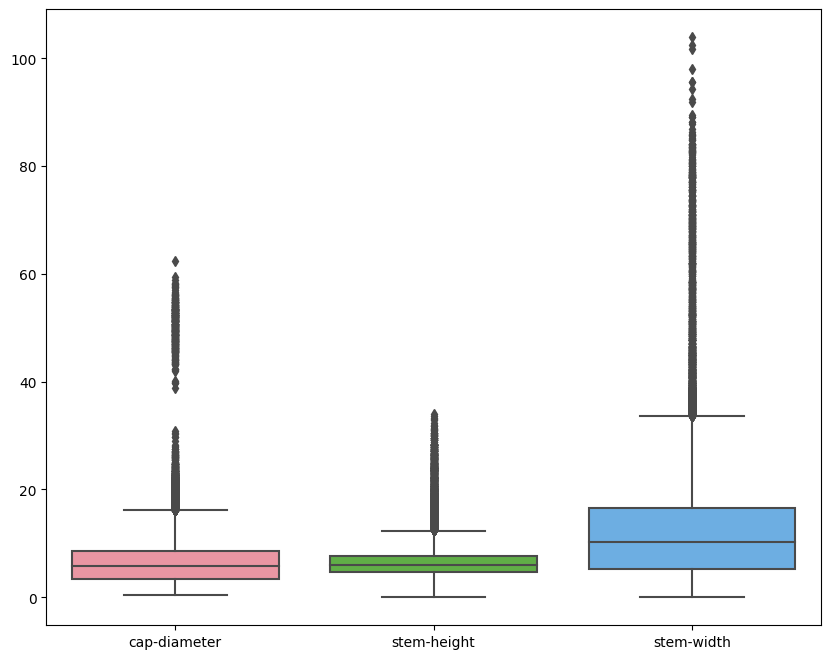

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df[['cap-diameter', 'stem-height', 'stem-width']])


The box plots reveal that this is a heavily skewed dataset with many outliers. Based on the plots above, these outlier mushrooms tend to be poisonous.

We can also create boxplots for each of these features based on the categorical outcome variable.

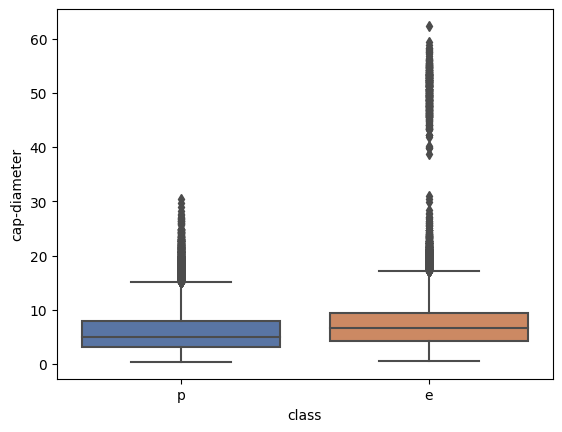

In [13]:
sns.boxplot(x=df['class'], y=df['cap-diameter'], palette='deep')
print()

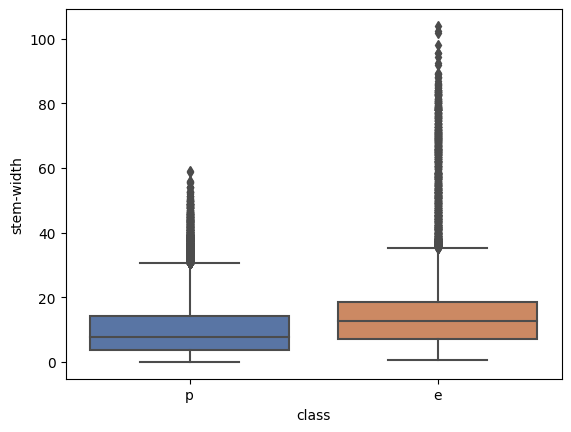

In [14]:
sns.boxplot(x=df['class'], y=df['stem-width'], palette='deep')
print()

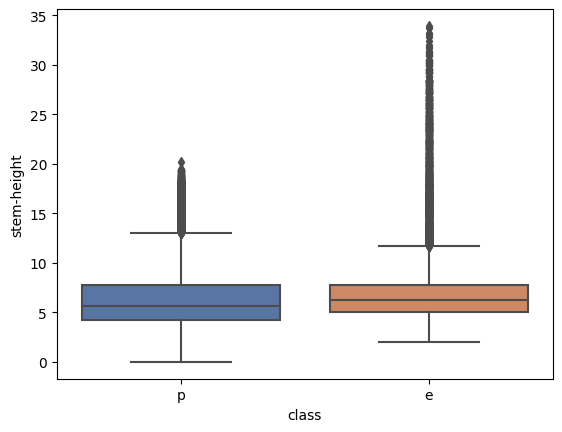

In [15]:
sns.boxplot(x=df['class'], y=df['stem-height'], palette='deep')
print()

These boxplots show that the interquartile range (IQR) is similar for each of these features for edible vs. poisonous mushrooms. This suggests that size alone is not sufficient for determining whether most mushrooms are poisonous.

Let's look at some of the categorical variables. Cap-color looks interesting, since color can be a good indication of toxicity in nature. Let's see how well this feature correlates with the outcome variable.

In [16]:
df['cap-color'].value_counts()

n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64

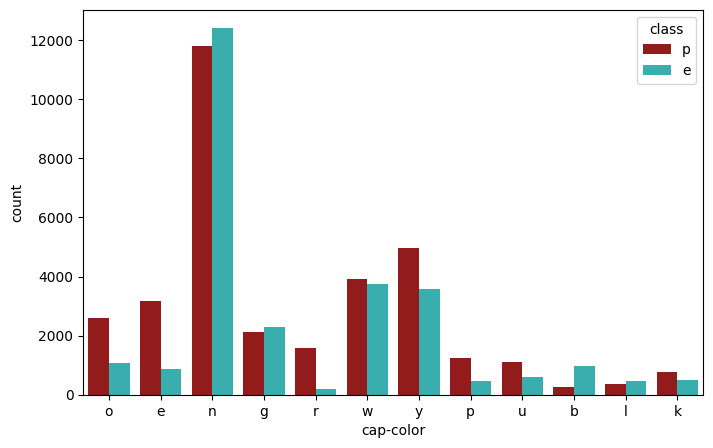

In [17]:
sns.set_palette(sns.color_palette(["#A60707", "#26C2C1"]))
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=df['cap-color'], hue=df['class'])
print()

cap-color does not seem to be a good indicator of whether or not a mushroom is poisonous - except if the mushroom is red. Then it's considerably more likely to be poisonous.

By graphing other categorical features this way, it was possible to find a handful of variables that could identify a mushroom as poisonous or edible. Below are the best categorical features for separating the outcome variable.

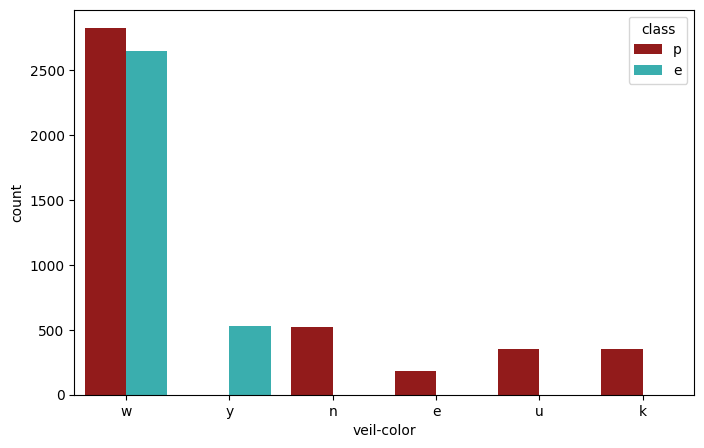

In [18]:
sns.set_palette(sns.color_palette(["#A60707", "#26C2C1"]))
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=df['veil-color'], hue=df['class'])
print()

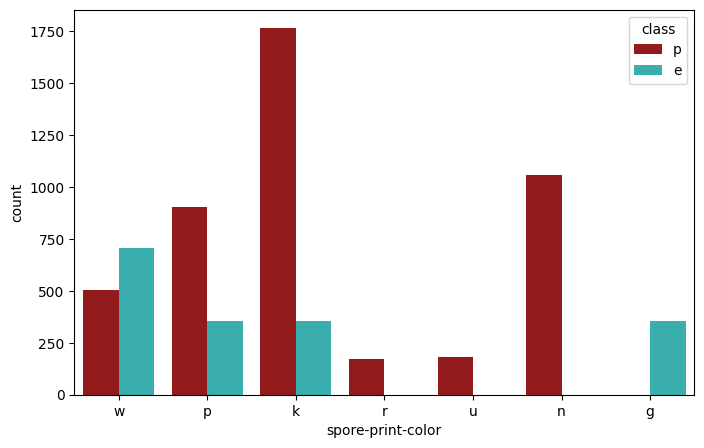

In [19]:
sns.set_palette(sns.color_palette(["#A60707", "#26C2C1"]))
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=df['spore-print-color'], hue=df['class'])
print()

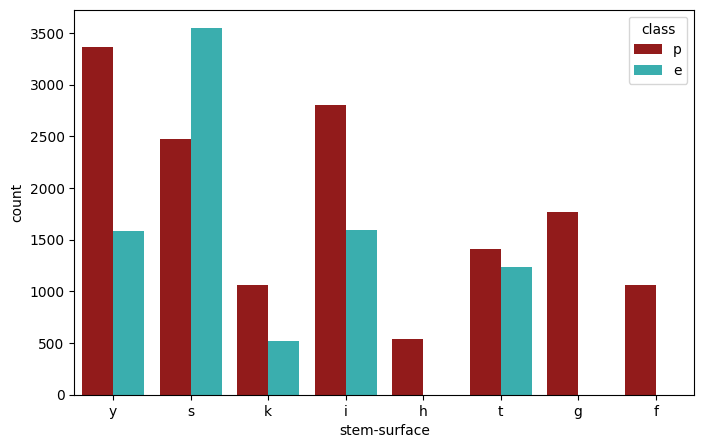

In [20]:
sns.set_palette(sns.color_palette(["#A60707", "#26C2C1"]))
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=df['stem-surface'], hue=df['class'])
print()

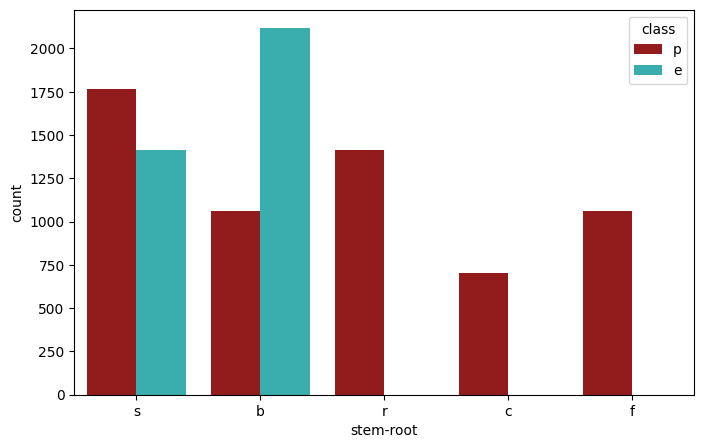

In [21]:
sns.set_palette(sns.color_palette(["#A60707", "#26C2C1"]))
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=df['stem-root'], hue=df['class'])
print()

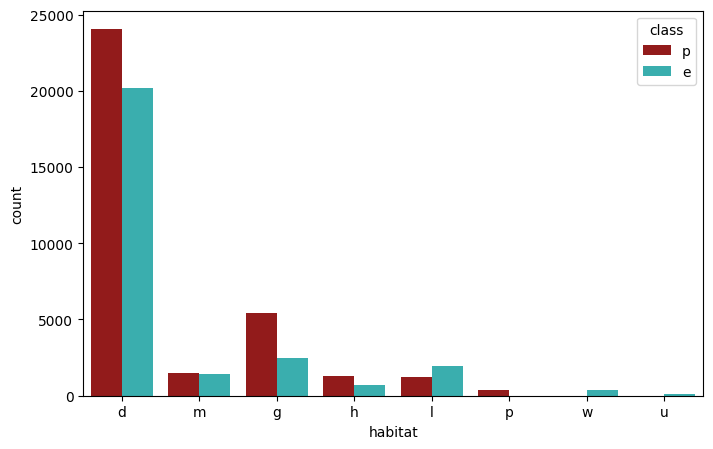

In [22]:
sns.set_palette(sns.color_palette(["#A60707", "#26C2C1"]))
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=df['habitat'], hue=df['class'])
print()

Veil-color in particular stands out as a feature that can conclusively identify a number of poisonous vs. edible mushrooms. Only white veils are inconclusive (though this is the majority of mushrooms). Let's see how this feature does when combined with some of the numerical variables analyzed above.

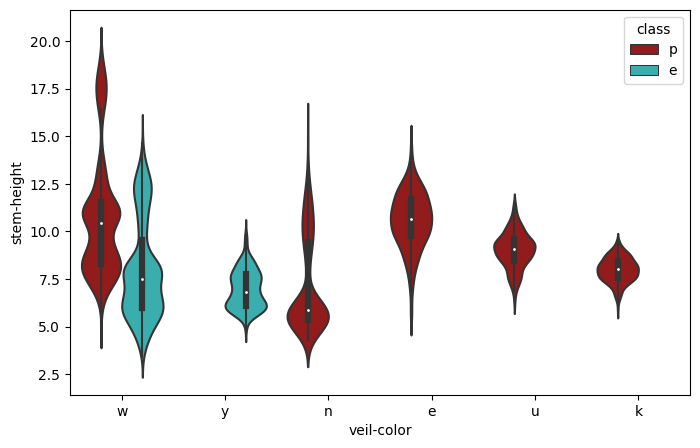

In [23]:
sns.set_palette(sns.color_palette(["#A60707", "#26C2C1"]))
f, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(x='veil-color', y='stem-height', data=df, hue='class')
print()

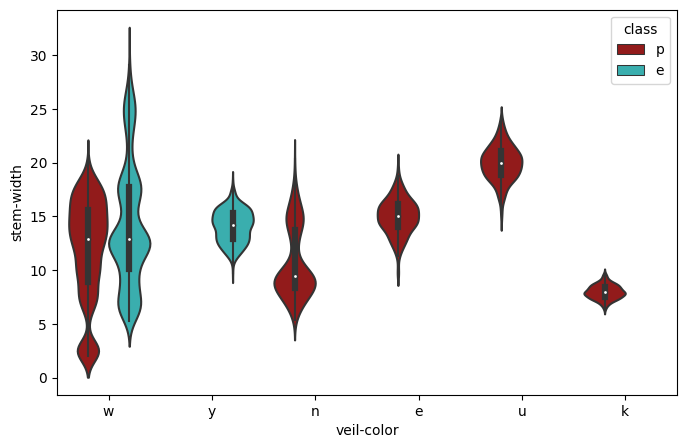

In [24]:
sns.set_palette(sns.color_palette(["#A60707", "#26C2C1"]))
f, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(x='veil-color', y='stem-width', data=df, hue='class')
print()

These violin plots provide the same information as a boxplot, but also include kde plots layered on top. So in addition to seeing the spread of the data, we can see the probability densities. The numerical variables unfortunately are not very helpful in further discriminating toxicity of mushrooms with white veils. There is some separation based on stem height, with poisonous mushrooms tending to be a bit taller. But it's a small difference. This suggests that further analysis needs to be done to tell these mushrooms apart. The next step should probably be to convert the categorical variables into a format that can be used by a machine learning model. By including more categorical features (including some plotted above) alongside the numerical features, it seems likely that a better predictive model could be constructed.